In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('epi_r.csv')

In [3]:
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

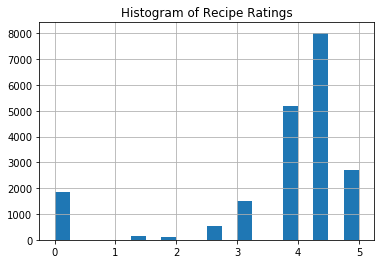

In [4]:
df.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [5]:
df.rating.unique()

array([ 2.5  ,  4.375,  3.75 ,  5.   ,  3.125,  1.875,  0.   ,  1.25 ])

In [6]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
#Drop null columns & title
df = df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

#Turn rating into binary column, where 1 is equal to a positive review
df['rating_b'] = np.where(df['rating'] > 3 , 1, 0)

#Converting binary columns from floats to int
df.astype('int64')

len(df.columns)

676

In [8]:
from sklearn.feature_selection import VarianceThreshold
#Set dependent and independent variables
X = df.drop(['rating', 'rating_b'], 1)
y = df.rating_b

#Remove low variance features
columns = X.columns
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
X = sel.fit_transform(X)
X = pd.DataFrame(X, columns=columns[sel.get_support()])

X.shape

(20052, 26)

In [9]:
print('Features used:\n\n' , list(X.columns))

Features used:

 ['bake', 'bon appétit', 'dairy free', 'dessert', 'dinner', 'fall', 'gourmet', 'healthy', 'kidney friendly', 'kosher', 'no sugar added', 'onion', 'peanut free', 'pescatarian', 'quick & easy', 'sauté', 'side', 'soy free', 'sugar conscious', 'summer', 'tomato', 'tree nut free', 'vegetable', 'vegetarian', 'wheat/gluten-free', 'winter']


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Setting a very large test size because SVC takes a long time to train especially with gridsearch. 5k rows.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.75)

#Setting up SVC classifier
clf = SVC(kernel='linear', class_weight='balanced')

#using gridsearch to find best C param
Cs = [0.1, 1, 5, 10]
param_grid = {'C': Cs}
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 0.1}


In [11]:
clf.set_params(**grid_search.best_params_)
clf.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
prediction = clf.predict(X_train)
print(clf.score(X_train, y_train))

0.779972072611


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, prediction)

array([[ 309,  355],
       [ 748, 3601]], dtype=int64)

In [14]:
clf.score(X_test, y_test)

0.78057051665669264

Scored 77%+ accuracy on train and test with 26 features.